In [115]:
import time
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
plt.ioff()

plt.rcParams.update(plt.rcParamsDefault)
px2inch = 1/plt.rcParams['figure.dpi']

SMALL_SIZE  = 8
MEDIUM_SIZE = 10

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
plt.rc('legend',fontsize=SMALL_SIZE, loc=1, framealpha=0.99) 

def plot_sets(ax,gr=False,ti='',xla='',yla='',xli=False, yli=False,ticks_off=False,xticks_off=False,yticks_off=False, ba=False, ar=False,leg=False):
    
    ax.grid(gr)
    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)

    if leg: ax.legend(**leg)


In [116]:

def get_C( C_lims= [0,1] ):
    fi   = np.random.rand()*2*np.pi
    M    = (C_lims[1]-C_lims[0]) * np.random.rand()  + C_lims[0]
    return M*( np.cos(fi) + 1j*np.sin(fi) )

def mandelbrot_iteration(N,C):
    
    Z    = np.full(N, np.nan, dtype=np.complex_)
    Z[0] = 0

    Z    = np.zeros(N, dtype=np.complex_)
     
    for i in range(N-1):
        Z[i+1] = Z[i]**2 + C
        if np.abs(Z[i])>=2:
           break
    return np.real(Z), np.imag(Z), C, i


def mandelbrot_iteration_C_dxy(N,C,C_dxy=1e-3):
    
    rnd  = 2*np.random.rand(2)-1
    C   += rnd[0]*C_dxy + 1j*rnd[1]*C_dxy 
    Z    = np.full(N, np.nan, dtype=np.complex_)
    Z[0] = 0

    for i in range(N-1):
        Z[i+1] = Z[i]**2 + C
        if np.abs(Z[i])>=2:
           break

    return np.real(Z), np.imag(Z), C, i

def distance_points(x,y):
    xy = np.hstack([x.reshape(-1,1),y.reshape(-1,1)])
    distance_P1_P2 = np.sqrt( np.sum(np.diff(xy,axis=0)**2,axis=1) )
    return distance_P1_P2

C0: 0.35743592 -0.34818064*1j
C1: -1.11246014 0.20219653*1j
C2: 0.01032329 -0.63708190*1j
C3: -0.95665721 -0.03426852*1j
C4: -0.18232861 -0.80835197*1j


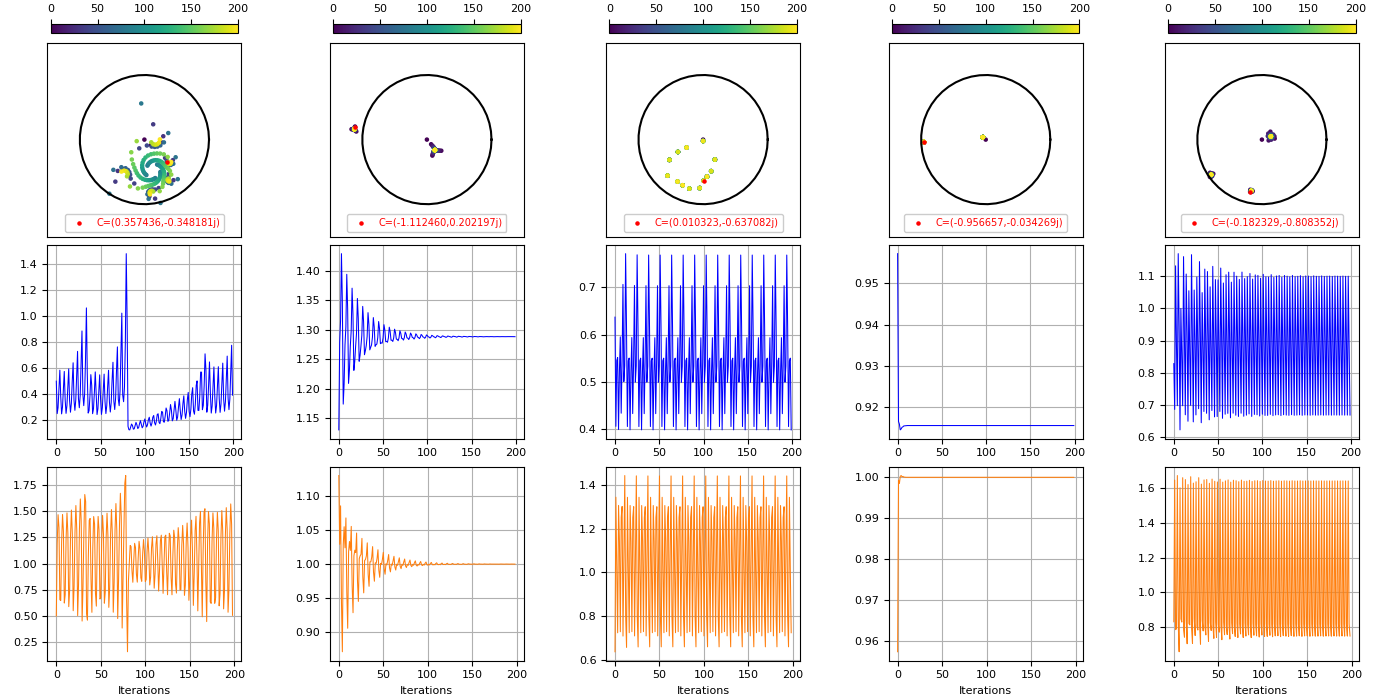

In [117]:


ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
axlim   = [-1.5,1.5]
MS      = 5

theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)
N      = 201
C_lims = [0.4,1.4]

for i in range(ncols):
    
    while True:
          x,y,C,iter     = mandelbrot_iteration(N,get_C(C_lims))
          distance_P1_P2 = distance_points(x,y)
          mean_dis       = np.mean(distance_P1_P2[-int(N/2):])
          estable        = N-2
          no_estable     = int(N/2)
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distance_P1_P2[1:]/distance_P1_P2[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(x, y, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':8,'fontsize':7})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distance_P1_P2  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()


C0: -0.73340200 0.13735693*1j
C1: -0.71697583 0.15439175*1j
C2: -0.71997317 0.15442216*1j
C3: -0.71867271 0.15114004*1j
C4: -0.73274874 0.14343740*1j


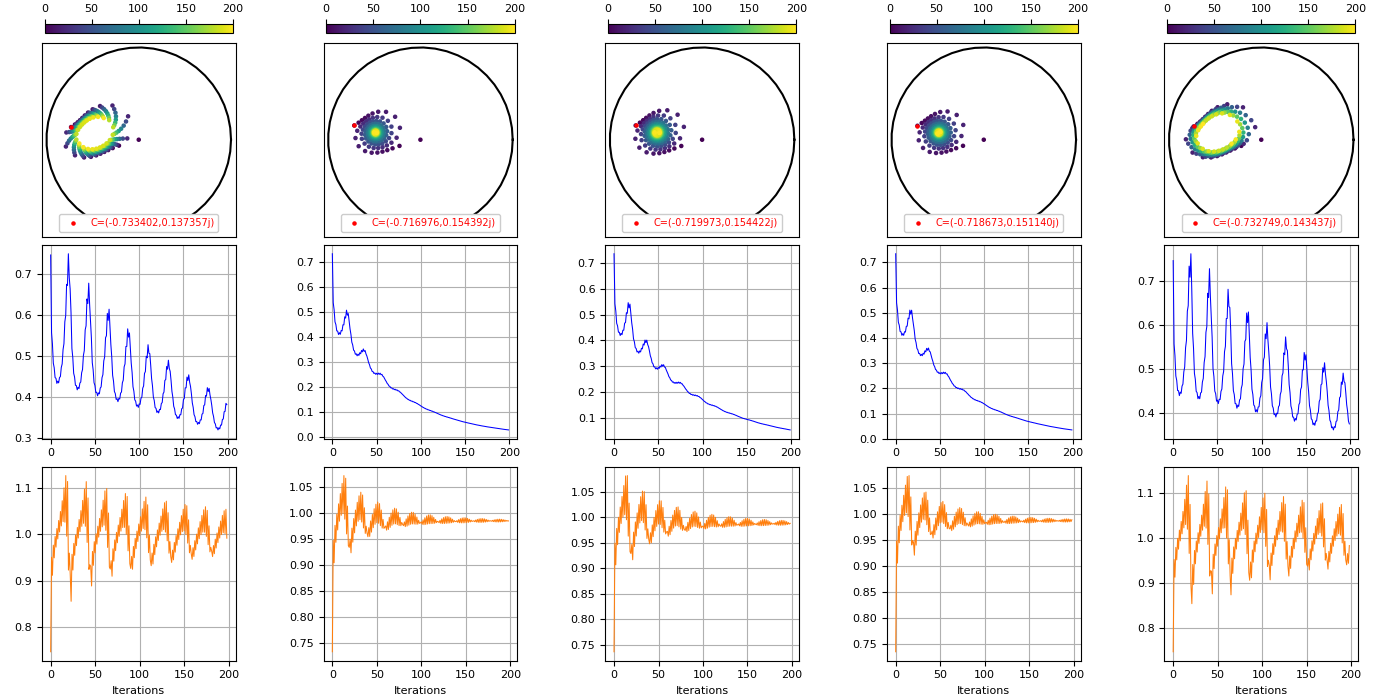

In [118]:


C_arr = [-0.72772108+0.14963497*1j,
         -0.68681531+0.29432931*1j,
         -0.08417608+0.64660606*1j]

ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
MS      = 5
axlim   = [-1.05,1.05]


theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)

N          = 201
C0         = -0.724567 + 0.146506*1j #get_C( C_lims )
estable    = N-2
no_estable = int(N/2)

for i in range(ncols):
    
    while True:

          C_dxy      = 0.01
          x,y,C,iter = mandelbrot_iteration_C_dxy(N, C0, C_dxy=C_dxy)
          distances  = distance_points(x,y)
          mean_dis   = np.mean(distances[-int(N/2):])
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distances[1:]/distances[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(x, y, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':8,'fontsize':7,'framealpha':0.99})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distances  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()


In [317]:

def maldelbrot(Nmax=200,Msize=500,lims={ "xlims":[-1.8,0.5],"ylims":[-1.2,1.2]}):
    
    dx = np.diff(lims["xlims"])[0]
    dy = np.diff(lims["ylims"])[0]
    if   dx>dy: Nx,Ny = round(dx/dy * Msize),round(Msize)
    elif dy>dx: Ny,Nx = round(dy/dx * Msize),round(Msize)
    else:       Ny,Nx = round(Msize),round(Msize)
    
    x     = np.linspace(lims["xlims"][0],lims["xlims"][1],Nx) # Ncols
    y     = np.linspace(lims["ylims"][0],lims["ylims"][1],Ny) # Nrows
    Re,Im = np.meshgrid(x,y)
    C     = Re + Im*1j
    Ma    = np.zeros((Ny,Nx))

    def iterations(Nmax,C):
        Z = 0
        for k in range(Nmax):
            Z = Z**2 + C
            if np.abs(Z)>=2: 
               break
        return k

    for row in range(Ny):
        for col in range(Nx):
            Ma[row,col] = iterations(Nmax,C[row,col])
    

    return Re,Im,Ma


In [324]:

lims1    = { "xlims":[-0.95,-0.89],"ylims":[0.23,0.335]}
Msize    = 5000
st       = time.time()
Re,Im,Ma = maldelbrot(Msize=Msize,lims=lims1)
ft = time.time()-st

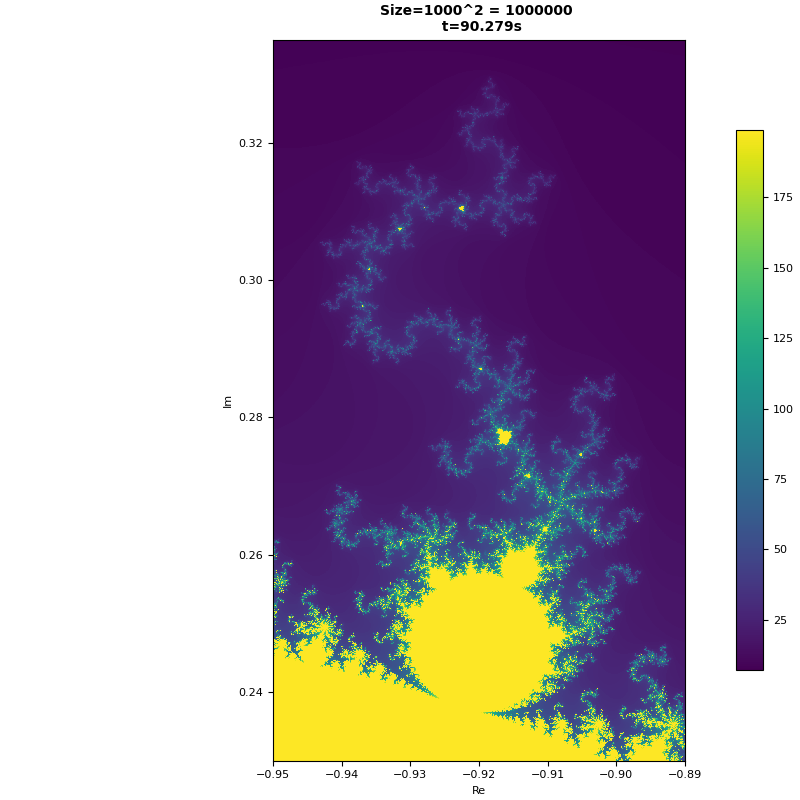

In [325]:
sizepx  = 800
fig, ax = plt.subplots(1,1,figsize=(sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.header_visible = False

plot_img = ax.pcolormesh(Re,Im, Ma)
fig.colorbar(plot_img, ax=ax, location='right', shrink=0.75)
plot_sets(ax,gr=False,ti=f'Size={Msize}^2 = {Msize**2} \n t={ft:0.3f}s',xla='Re',yla='Im',ar=1)

plt.imsave('imgs/Maldelbro_spiral3.png',np.flipud(Ma))
plt.show()

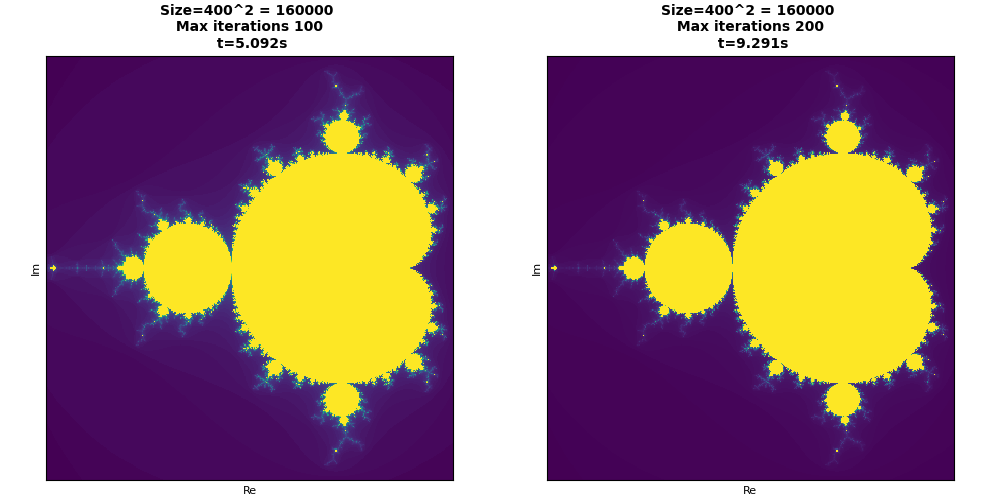

In [180]:
sizepx  = 500
fig, ax = plt.subplots(1,2,figsize=(2*sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.header_visible = False

Msize_arr = [400,400]
Nmax_arr  = [100,200]
for i,(N,M) in enumerate(zip(Nmax_arr,Msize_arr)):
    st = time.time()
    Re,Im,Ma = maldelbrot(Nmax=N,Msize=M)
    ft = time.time()-st
    ax[i].pcolormesh(Re,Im, Ma)
    ax[i].set_aspect(1)
    plot_sets(ax[i],gr=False,ti=f'Size={M}^2 = {M**2} \n Max iterations {N} \n t={ft:0.3f}s',xla='Re',yla='Im',ticks_off=1,ar=1)

plt.show()

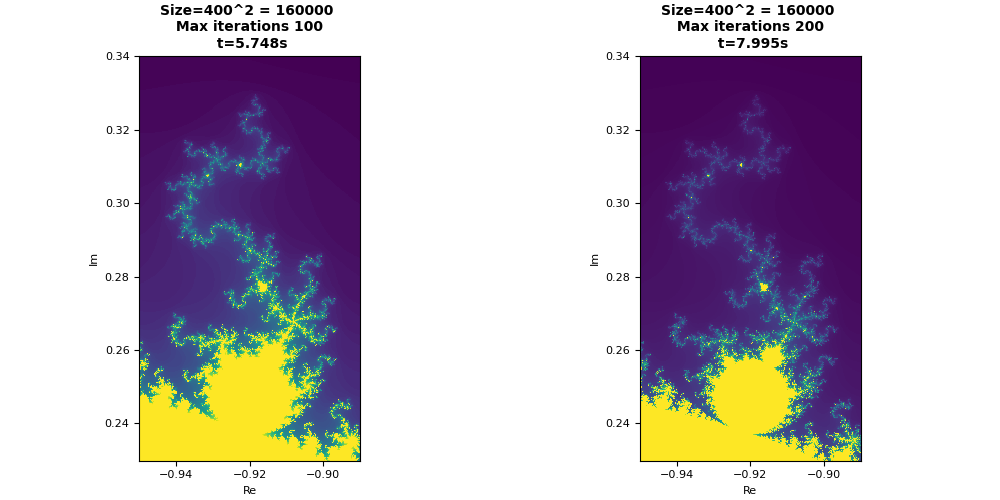

In [204]:
sizepx  = 500
fig, ax = plt.subplots(1,2,figsize=(2*sizepx*px2inch, sizepx*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
lims1     = { "xlims":[-0.95,-0.89],"ylims":[0.23,0.34]}
Msize_arr = [400,400]
Nmax_arr  = [100,200]
for i,(N,M) in enumerate(zip(Nmax_arr,Msize_arr)):
    st = time.time()
    Re,Im,Ma = maldelbrot(Nmax=N,Msize=M,lims=lims1)
    ft = time.time()-st
    ax[i].pcolormesh(Re,Im, Ma)
    ax[i].set_aspect(1)
    plot_sets(ax[i],gr=False,ti=f'Size={M}^2 = {M**2} \n Max iterations {N} \n t={ft:0.3f}s',xla='Re',yla='Im',ar=1)

plt.show()